# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []
units = "metric"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | ust-nera
Processing Record 3 of Set 1 | weno
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | flying fish cove
Processing Record 10 of Set 1 | torbali
Processing Record 11 of Set 1 | ash shatrah
Processing Record 12 of Set 1 | geraldton
Processing Record 13 of Set 1 | pandan
Processing Record 14 of Set 1 | quiberon
Processing Record 15 of Set 1 | acarau
Processing Record 16 of Set 1 | lasem
Processing Record 17 of Set 1 | kupang
Processing Record 18 of Set 1 | luderitz
Processing Record 19 of Set 1 | gadzhiyevo
Processing Record 20 of Set 1 | tofol
Processing Record 21 of Set 1 | kone
Processing Record 22 of Set 1 | alo
Processing Record 23 of Set 1 | melilla
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,4.16,82,96,4.60,US,1682636461
1,ust-nera,64.5667,143.2000,-2.97,81,23,0.95,RU,1682636461
2,weno,7.4515,151.8468,25.97,89,100,1.54,FM,1682635890
3,stanley,54.8680,-1.6985,7.09,82,20,3.09,GB,1682636379
4,olonkinbyen,70.9221,-8.7187,-1.72,95,100,10.80,SJ,1682636462


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,4.16,82,96,4.60,US,1682636461
1,ust-nera,64.5667,143.2000,-2.97,81,23,0.95,RU,1682636461
2,weno,7.4515,151.8468,25.97,89,100,1.54,FM,1682635890
3,stanley,54.8680,-1.6985,7.09,82,20,3.09,GB,1682636379
4,olonkinbyen,70.9221,-8.7187,-1.72,95,100,10.80,SJ,1682636462


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

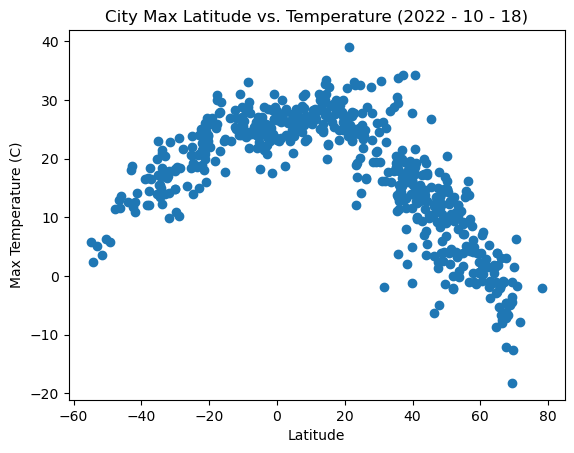

In [11]:
# Build scatter plot for latitude vs. temperature
latitudes = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
plt.scatter(latitudes, max_temps)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Temperature (2022 - 10 - 18)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

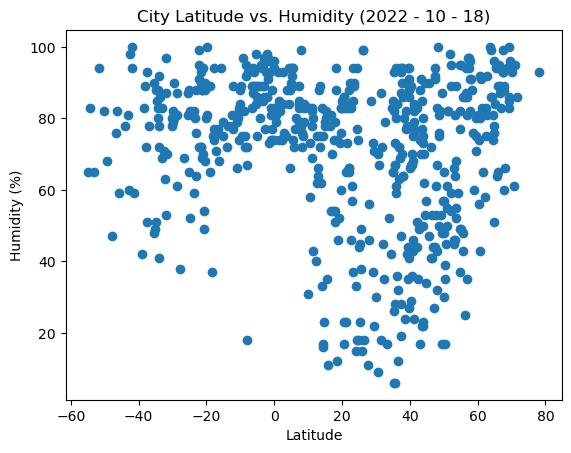

In [13]:
# Build the scatter plots for latitude vs. humidity
humidty = city_data_df['Humidity']
plt.scatter(latitudes, humidty)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (2022 - 10 - 18)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

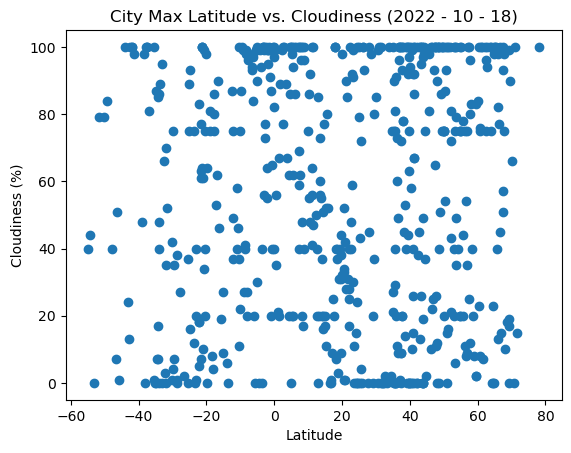

In [14]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']
max_temps = city_data_df['Max Temp']
plt.scatter(latitudes, cloudiness)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Cloudiness (2022 - 10 - 18)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

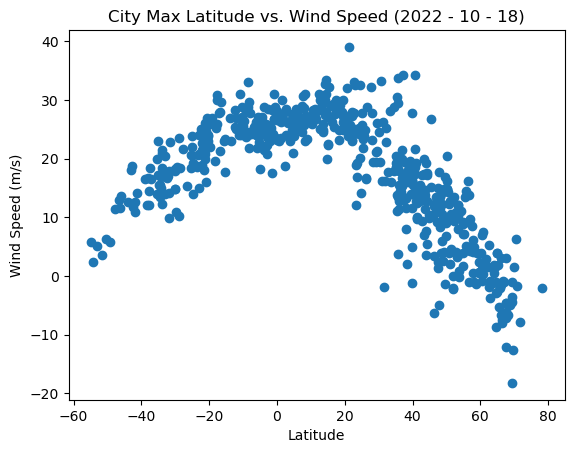

In [15]:
# Build the scatter plots for latitude vs. wind speed
wind = city_data_df['Wind Speed']
plt.scatter(latitudes, max_temps)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Wind Speed (2022 - 10 - 18)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


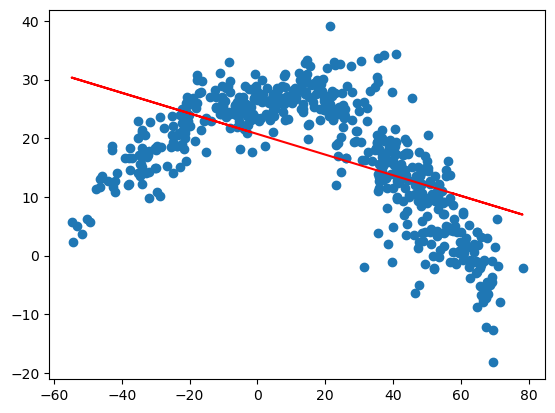

In [17]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Max Temp"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
north_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,4.16,82,96,4.60,US,1682636461
1,ust-nera,64.5667,143.2000,-2.97,81,23,0.95,RU,1682636461
2,weno,7.4515,151.8468,25.97,89,100,1.54,FM,1682635890
3,stanley,54.8680,-1.6985,7.09,82,20,3.09,GB,1682636379
4,olonkinbyen,70.9221,-8.7187,-1.72,95,100,10.80,SJ,1682636462


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,waitangi,-43.9535,-176.5597,12.68,78,100,0.89,NZ,1682636462
7,port-aux-francais,-49.3500,70.2167,5.80,68,84,12.30,TF,1682636464
8,flying fish cove,-10.4217,105.6791,27.07,82,100,7.87,CX,1682635872
11,geraldton,-28.7667,114.6000,10.23,81,0,5.14,AU,1682636465
14,acarau,-2.8856,-40.1200,24.36,89,100,2.33,BR,1682636467


###  Temperature vs. Latitude Linear Regression Plot

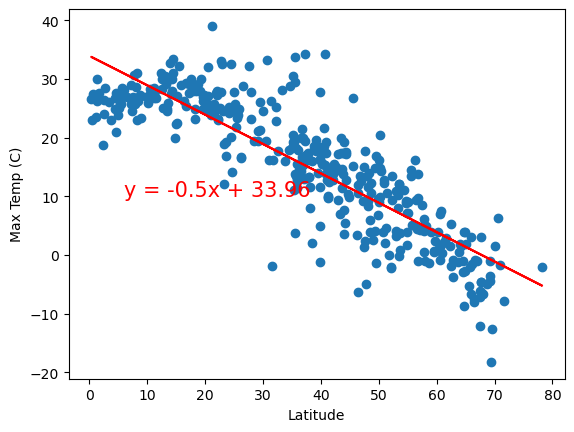

In [27]:
# Linear regression on Northern Hemisphere
x_values = north_hemi_df["Lat"].astype("float")
y_values = north_hemi_df["Max Temp"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')

# Plot regression line
plt.plot(x_values,regress_values,"r-")

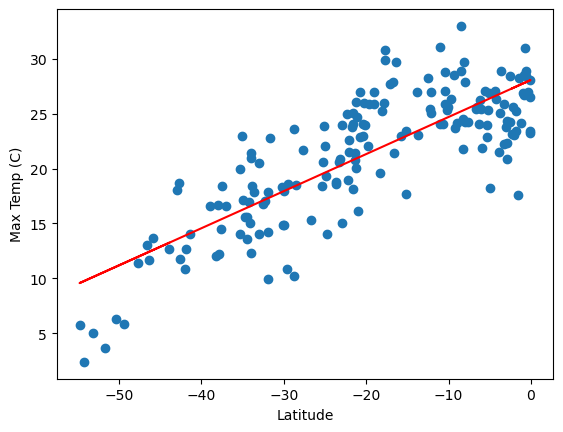

In [29]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Max Temp"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
# Plot regression line
plt.plot(x_values,regress_values,"r-")

**Discussion about the linear relationship:** 
In the above two plots we are demonstrating the relationship between Latitude and Max Temp. Findings demonstrate that their is correlation between Latitude and Max Temp in both hemispheres and that the closer you get to 0 in Lat the higher the max temp will be on average.

### Humidity vs. Latitude Linear Regression Plot

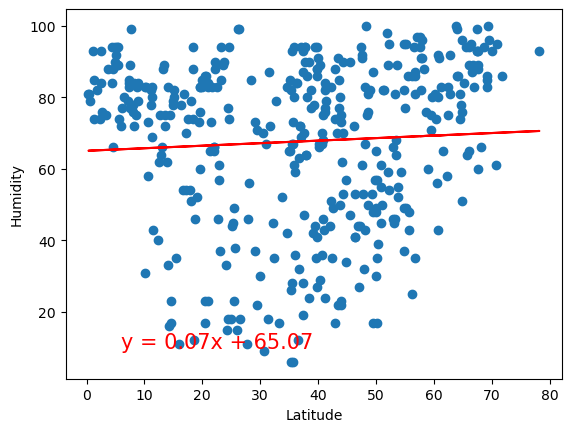

In [30]:
# Northern Hemisphere
x_values = north_hemi_df["Lat"].astype("float")
y_values = north_hemi_df["Humidity"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Plot regression line
plt.plot(x_values,regress_values,"r-")

0.2903499142622829


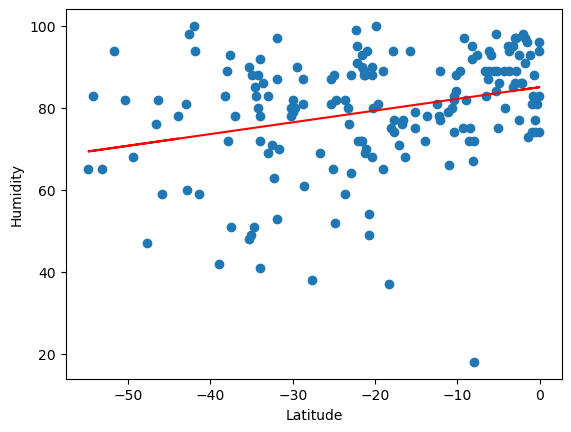

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Humidity"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# Plot regression line
plt.plot(x_values,regress_values,"r-")
print(rvalue)

**Discussion about the linear relationship:** YOUR RESPONSE HERE
In the above two plots we are demonstrating the relationship between Latitude and Humidity. Findings demonstrate that there is a correlation between Latitude and Humidity in both hemispheres and that the closer the latitude is to 0 the higher humidity is on average.

### Cloudiness vs. Latitude Linear Regression Plot

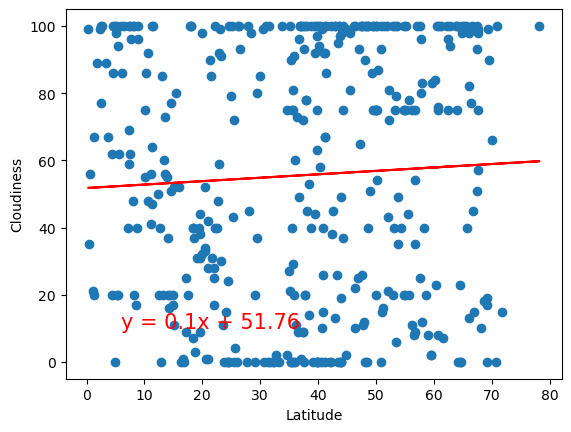

In [32]:
# Northern Hemisphere
x_values = north_hemi_df["Lat"].astype("float")
y_values = north_hemi_df["Cloudiness"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Plot regression line
plt.plot(x_values,regress_values,"r-")

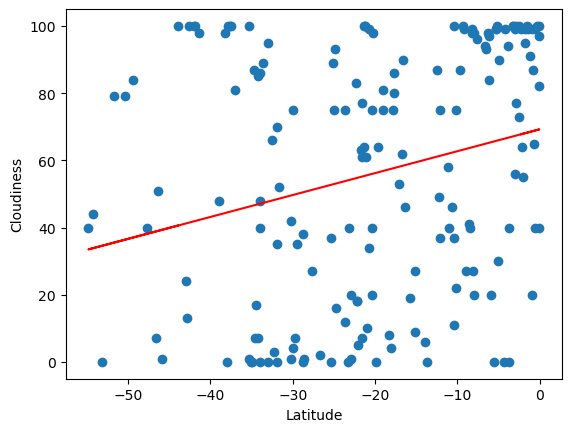

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Cloudiness"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# Plot regression line
plt.plot(x_values,regress_values,"r-")

**Discussion about the linear relationship:** YOUR RESPONSE HERE
In the above two plots we are demonstrating the relationship between Latitude and Cloudiness. Findings demonstrate that their is a poor correlation between Latitude and Cloudiness in both hemispheres and that cloudiness is distributed across all latitudes.

### Wind Speed vs. Latitude Linear Regression Plot

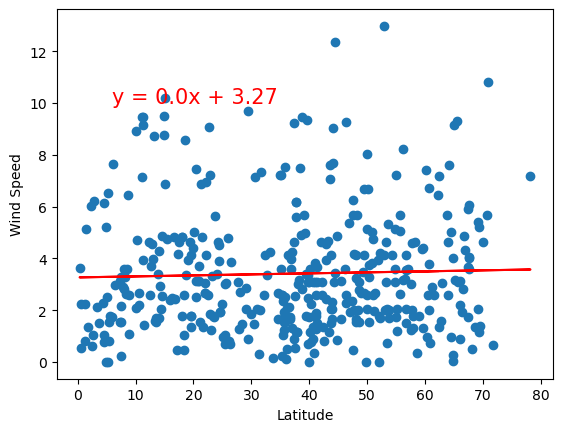

In [35]:
# Northern Hemisphere
x_values = north_hemi_df["Lat"].astype("float")
y_values = north_hemi_df["Wind Speed"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# Plot regression line
plt.plot(x_values,regress_values,"r-")

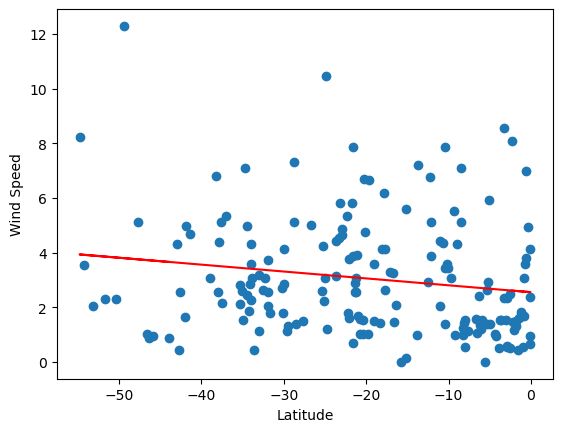

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df['Wind Speed'].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# Plot regression line
plt.plot(x_values,regress_values,"r-")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the above two plots we are demonstrating the relationship between Latitude and Wind Speeds. Findings demonstrate that their is a poor correlation between Latitude and Wind Speed in both hemispheres and that wind speed is distributed across all latitudes.